In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("c:/Users/lucho/Desktop/Programacion/Python/Linkedin Data Science/base_datos_2008.csv", nrows = 500000)
df.dropna(inplace = True, subset = ["ArrDelay", "DepDelay","Distance","AirTime"])
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2008,1,31,4,1429.0,1330,1946.0,1900,AA,1144,...,14.0,11.0,0,NaN,0,0.0,0.0,24.0,0.0,22.0
499996,2008,1,1,2,1223.0,1125,1453.0,1350,AA,1145,...,4.0,17.0,0,NaN,0,0.0,24.0,5.0,0.0,34.0
499997,2008,1,2,3,1150.0,1125,1408.0,1350,AA,1145,...,2.0,14.0,0,NaN,0,17.0,0.0,0.0,0.0,1.0
499998,2008,1,3,4,1122.0,1125,1338.0,1350,AA,1145,...,2.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [9]:
# Ajusta el tamaño del grafico
sns.set(rc = {"figure.figsize":(15,10)})

C:\Users\lucho\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


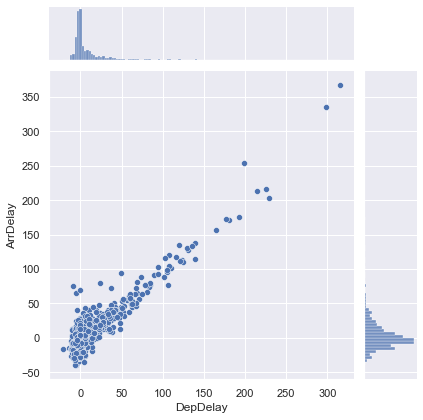

In [11]:
# Sample con los vuelos que muestra ahi
df2 = df[df["Origin"].isin(["PHX","HOU","IND"])].sample(frac =1).head(1000)

# Nuve de puntos con dos columnas
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

C:\Users\lucho\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


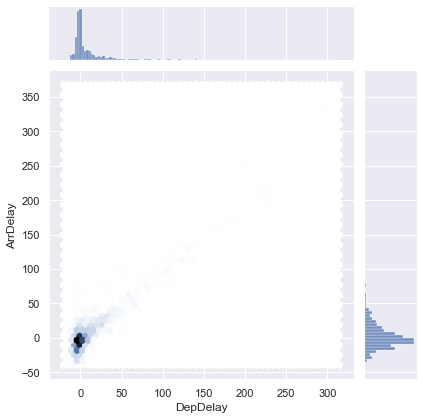

In [14]:
sns.jointplot(df2["DepDelay"],df2["ArrDelay"], kind = "hex")
df2 = df[df["Origin"].isin(["PHX","HOU","IND"])].sample(frac =1).head(1000)

C:\Users\lucho\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


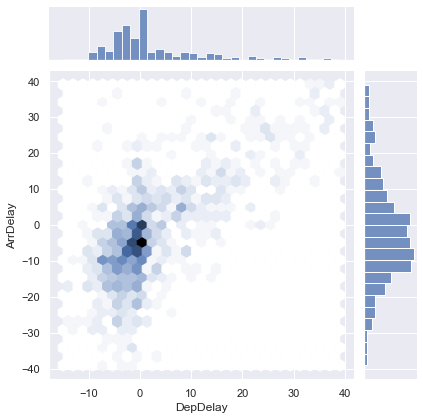

In [16]:
# Ponemos unos filtros para visualizar mejor los valores
df3 = df2[np.abs(df2["DepDelay"]) < 40]
df3 = df3[np.abs(df3["ArrDelay"]) < 40]
sns.jointplot(df3["DepDelay"],df3["ArrDelay"], kind = "hex")

C:\Users\lucho\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


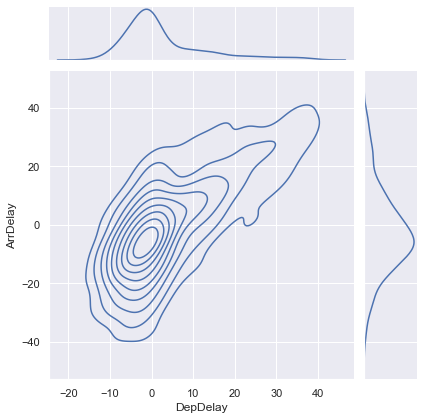

In [17]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"], kind = "kde")

# Mapas de calor

In [33]:
# calculamos la media del Dep Delay por cada aeropuerto y mes
df = pd.read_csv("c:/Users/lucho/Desktop/Programacion/Python/Linkedin Data Science/base_datos_2008.csv")

df2 = df[df["Origin"].isin(["PHX","HOU","IND"])].sample(frac =1).head(1000)

gd_df = pd.DataFrame(df2.groupby(["Origin","Month"], as_index = False)["DepDelay"].mean())
gd_df.head()

,Origin,Month,DepDelay
0,HOU,1,9.400000
1,HOU,2,22.437500
2,HOU,3,14.736842
3,HOU,4,7.500000
4,HOU,5,1.933333


In [34]:
#Trasformamos el objeto para dejarlo mejor
data = gd_df.pivot("Month","Origin","DepDelay")
data

Origin,HOU,IND,PHX
Month,,,
1,9.400000,9.466667,7.016129
2,22.437500,17.875000,9.875000
3,14.736842,59.454545,11.603448
4,7.500000,-0.750000,6.826923
5,1.933333,-1.500000,17.439394
6,13.866667,-0.666667,8.450980
7,6.000000,23.142857,9.636364
8,10.000000,18.200000,9.000000
9,-2.076923,-5.142857,2.659574


<AxesSubplot:xlabel='Origin', ylabel='Month'>

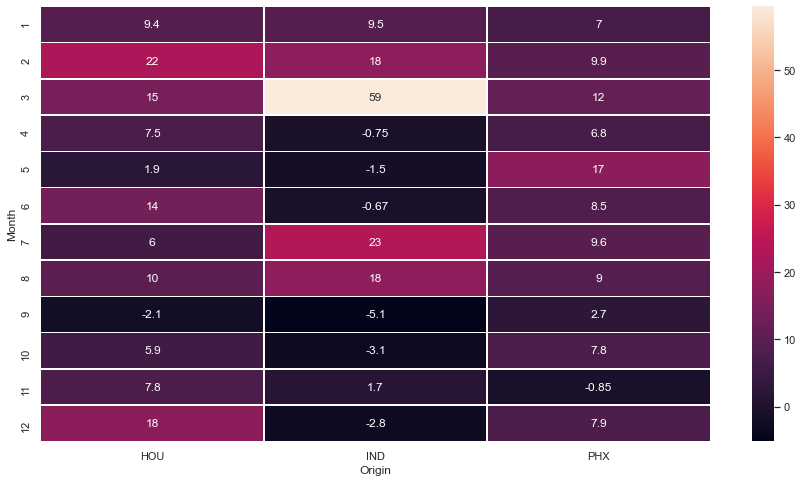

In [35]:
#Crear el heatmap
sns.set(rc={"figure.figsize":(15,8)})
sns.heatmap(data = data,annot = True, linewidths = .5)